In [ ]:
#datasets : 
#COVID 19 - https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta
#CoV2SD614G :: https://www.ncbi.nlm.nih.gov/nuccore/MW560960.1?report=fasta&log$=seqview
#CoV-2-S-E484K : https://www.ncbi.nlm.nih.gov/nuccore/MW598454.1?report=fasta&log$=seqview

In [1]:
#1
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
#2
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#3
downloaded = drive.CreateFile({'id':'1skyXQ42q-ytgv9BZh86gCDJl5EVYohcu'}) # replace the id with id of file you want to access
downloaded.GetContentFile('sequence-0.fasta') 

In [5]:
!pip install biopython
!pip install Squiggle

     |████████████████████████████████| 2.3MB 5.1MB/s 
  Created wheel for pyfaidx: filename=pyfaidx-0.5.9.5-cp37-none-any.whl size=25142 sha256=82b3b0cfc4720caf2badf16a1f5da744936d618a74d3d7b387f9dbbd1e859c0d
  Stored in directory: /root/.cache/pip/wheels/d8/31/5f/8053c426a420cc407492252723f20e9a9c7e717909d7e08a9e
Successfully built pyfaidx


In [6]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [7]:
from Bio import SeqIO
for sequence in SeqIO.parse('sequence-0.fasta', "fasta"):
   print(sequence.seq)
print(len(sequence),'nucliotides')

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [8]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
DNAsequence = SeqIO.read('sequence-0.fasta', "fasta")
print(DNAsequence)

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [13]:
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [16]:
from collections import Counter
covid=SeqIO.read("sequence-0.fasta",'fasta')
# Convert or Get the sequences
covid_seq = covid.seq
#17
# Check the length of each sequence
print("covid_seq ::",len(covid_seq))
#18
# Check for the GC Content/ Which of them is more heat stable
from Bio.SeqUtils import GC
#19
# Check the length of each sequence
print("GC content of covid_seq ::",GC(covid_seq))


covid_seq :: 29903
GC content of covid_seq :: 37.97277865097148


In [17]:
def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [19]:
downloaded = drive.CreateFile({'id':'1jtV6m8DZwgaWNYIwROKF8DBgk5kSDBAr'}) # replace the id with id of file you want to access
downloaded.GetContentFile('sequence-1.fasta') 

In [22]:
from Bio import SeqIO
for sequence in SeqIO.parse('sequence-1.fasta', "fasta"):
   print(sequence.seq)
print(len(sequence),'nucliotides')

GAGGCGGTTTGCGTATTGGGCGCTCTTCCGCTTCCTCGCTCACTGACTCGCTGCGCTCGGTCGTTCGGCTGCGGCGAGCGGTATCAGCTCACTCAAAGGCGGTAATACGGTTATCCACAGAATCAGGGGATAACGCAGGAAAGAACATGTGAGCAAAAGGCCAGCAAAAGGCCAGGAACCGTAAAAAGGCCGCGTTGCTGGCGTTTTTCCATAGGCTCCGCCCCCCTGACGAGCATCACAAAAATCGACGCTCAAGTCAGAGGTGGCGAAACCCGACAGGACTATAAAGATACCAGGCGTTTCCCCCTGGAAGCTCCCTCGTGCGCTCTCCTGTTCCGACCCTGCCGCTTACCGGATACCTGTCCGCCTTTCTCCCTTCGGGAAGCGTGGCGCTTTCTCATAGCTCACGCTGTAGGTATCTCAGTTCGGTGTAGGTCGTTCGCTCCAAGCTGGGCTGTGTGCACGAACCCCCCGTTCAGCCCGACCGCTGCGCCTTATCCGGTAACTATCGTCTTGAGTCCAACCCGGTAAGACACGACTTATCGCCACTGGCAGCAGCCACTGGTAACAGGATTAGCAGAGCGAGGTATGTAGGCGGTGCTACAGAGTTCTTGAAGTGGTGGCCTAACTACGGCTACACTAGAAGAACAGTATTTGGTATCTGCGCTCTGCTGAAGCCAGTTACCTTCGGAAAAAGAGTTGGTAGCTCTTGATCCGGCAAACAAACCACCGCTGGTAGCGGTGGTTTTTTTGTTTGCAAGCAGCAGATTACGCGCAGAAAAAAAGGATCTCAAGAAGATCCTTTGATCTTTTCTACGGGGTCTGACGCTCAGTGGAACGAAAACTCACGTTAAGGGATTTTGGTCATGAGATTATCAAAAAGGATCTTCACCTAGATCCTTTTAAATTAAAAATGAAGTTTTAAATCAATCTAAAGTATATATGAGTAAACTTGGTCTGACAGTTACCAATGCTTAATCAGTGAGGCACCTATCTCAGC

In [24]:
s1 = SeqIO.read("sequence-1.fasta","fasta")
s1_seq = s1.seq
print(s1_seq)

GAGGCGGTTTGCGTATTGGGCGCTCTTCCGCTTCCTCGCTCACTGACTCGCTGCGCTCGGTCGTTCGGCTGCGGCGAGCGGTATCAGCTCACTCAAAGGCGGTAATACGGTTATCCACAGAATCAGGGGATAACGCAGGAAAGAACATGTGAGCAAAAGGCCAGCAAAAGGCCAGGAACCGTAAAAAGGCCGCGTTGCTGGCGTTTTTCCATAGGCTCCGCCCCCCTGACGAGCATCACAAAAATCGACGCTCAAGTCAGAGGTGGCGAAACCCGACAGGACTATAAAGATACCAGGCGTTTCCCCCTGGAAGCTCCCTCGTGCGCTCTCCTGTTCCGACCCTGCCGCTTACCGGATACCTGTCCGCCTTTCTCCCTTCGGGAAGCGTGGCGCTTTCTCATAGCTCACGCTGTAGGTATCTCAGTTCGGTGTAGGTCGTTCGCTCCAAGCTGGGCTGTGTGCACGAACCCCCCGTTCAGCCCGACCGCTGCGCCTTATCCGGTAACTATCGTCTTGAGTCCAACCCGGTAAGACACGACTTATCGCCACTGGCAGCAGCCACTGGTAACAGGATTAGCAGAGCGAGGTATGTAGGCGGTGCTACAGAGTTCTTGAAGTGGTGGCCTAACTACGGCTACACTAGAAGAACAGTATTTGGTATCTGCGCTCTGCTGAAGCCAGTTACCTTCGGAAAAAGAGTTGGTAGCTCTTGATCCGGCAAACAAACCACCGCTGGTAGCGGTGGTTTTTTTGTTTGCAAGCAGCAGATTACGCGCAGAAAAAAAGGATCTCAAGAAGATCCTTTGATCTTTTCTACGGGGTCTGACGCTCAGTGGAACGAAAACTCACGTTAAGGGATTTTGGTCATGAGATTATCAAAAAGGATCTTCACCTAGATCCTTTTAAATTAAAAATGAAGTTTTAAATCAATCTAAAGTATATATGAGTAAACTTGGTCTGACAGTTACCAATGCTTAATCAGTGAGGCACCTATCTCAGC

In [28]:
downloaded = drive.CreateFile({'id':'165wuBBj9NSThJJeCTeu4JJZjSACLKPKN'}) # replace the id with id of file you want to access
downloaded.GetContentFile('sequence-2.fasta') 
from Bio import SeqIO
for sequence in SeqIO.parse('sequence-2.fasta', "fasta"):
   print(sequence.seq)
print(len(sequence),'nucliotides')
s2 = SeqIO.read("sequence-2.fasta","fasta")
s2_seq = s2.seq
print(s2_seq)

GAGGCGGTTTGCGTATTGGGCGCTCTTCCGCTTCCTCGCTCACTGACTCGCTGCGCTCGGTCGTTCGGCTGCGGCGAGCGGTATCAGCTCACTCAAAGGCGGTAATACGGTTATCCACAGAATCAGGGGATAACGCAGGAAAGAACATGTGAGCAAAAGGCCAGCAAAAGGCCAGGAACCGTAAAAAGGCCGCGTTGCTGGCGTTTTTCCATAGGCTCCGCCCCCCTGACGAGCATCACAAAAATCGACGCTCAAGTCAGAGGTGGCGAAACCCGACAGGACTATAAAGATACCAGGCGTTTCCCCCTGGAAGCTCCCTCGTGCGCTCTCCTGTTCCGACCCTGCCGCTTACCGGATACCTGTCCGCCTTTCTCCCTTCGGGAAGCGTGGCGCTTTCTCATAGCTCACGCTGTAGGTATCTCAGTTCGGTGTAGGTCGTTCGCTCCAAGCTGGGCTGTGTGCACGAACCCCCCGTTCAGCCCGACCGCTGCGCCTTATCCGGTAACTATCGTCTTGAGTCCAACCCGGTAAGACACGACTTATCGCCACTGGCAGCAGCCACTGGTAACAGGATTAGCAGAGCGAGGTATGTAGGCGGTGCTACAGAGTTCTTGAAGTGGTGGCCTAACTACGGCTACACTAGAAGAACAGTATTTGGTATCTGCGCTCTGCTGAAGCCAGTTACCTTCGGAAAAAGAGTTGGTAGCTCTTGATCCGGCAAACAAACCACCGCTGGTAGCGGTGGTTTTTTTGTTTGCAAGCAGCAGATTACGCGCAGAAAAAAAGGATCTCAAGAAGATCCTTTGATCTTTTCTACGGGGTCTGACGCTCAGTGGAACGAAAACTCACGTTAAGGGATTTTGGTCATGAGATTATCAAAAAGGATCTTCACCTAGATCCTTTTAAATTAAAAATGAAGTTTTAAATCAATCTAAAGTATATATGAGTAAACTTGGTCTGACAGTTACCAATGCTTAATCAGTGAGGCACCTATCTCAGC

In [25]:
dotplot(covid_seq[0:50],s1_seq[0:50])

 |GAGGCGGTTTGCGTATTGGGCGCTCTTCCGCTTCCTCGCTCACTGACTCG
----------------------------------------------------
A| ■            ■                          ■   ■    
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
A| ■            ■                          ■   ■    
A| ■            ■                          ■   ■    
A| ■            ■                          ■   ■    
G|■ ■■ ■■   ■ ■    ■■■ ■       ■       ■      ■    ■
G|■ ■■ ■■   ■ ■    ■■■ ■       ■       ■      ■    ■
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
A| ■            ■                          ■   ■    
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
A| ■            ■                          ■   ■    
C|    ■      ■        ■ ■ ■  ■■ ■  ■■ ■ ■ ■ ■   ■ ■ 
C|    ■      ■        ■ ■ ■  ■■ ■  ■■ ■ ■ ■ ■   ■ ■ 
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■

In [26]:
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

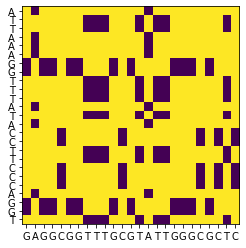

In [27]:
dotplotx(covid_seq[0:25],s1_seq[0:25])

In [29]:
dotplot(covid_seq[0:50],s2_seq[0:50])

 |GAGGCGGTTTGCGTATTGGGCGCTCTTCCGCTTCCTCGCTCACTGACTCG
----------------------------------------------------
A| ■            ■                          ■   ■    
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
A| ■            ■                          ■   ■    
A| ■            ■                          ■   ■    
A| ■            ■                          ■   ■    
G|■ ■■ ■■   ■ ■    ■■■ ■       ■       ■      ■    ■
G|■ ■■ ■■   ■ ■    ■■■ ■       ■       ■      ■    ■
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
A| ■            ■                          ■   ■    
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■   ■  
A| ■            ■                          ■   ■    
C|    ■      ■        ■ ■ ■  ■■ ■  ■■ ■ ■ ■ ■   ■ ■ 
C|    ■      ■        ■ ■ ■  ■■ ■  ■■ ■ ■ ■ ■   ■ ■ 
T|       ■■■   ■ ■■      ■ ■■    ■■  ■   ■   ■

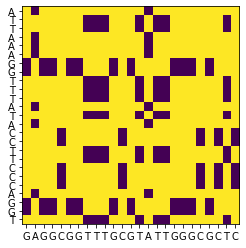

In [30]:
dotplotx(covid_seq[0:25],s2_seq[0:25])